<a href="https://colab.research.google.com/github/hari-prasath-j/Aristocrat-Milestone-project-1/blob/main/Aristocrat_Milestone_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title : Development of a Predictive model for Pre-Owned car price analysis using python.

**Objectives** : The objective of building the machine learning for pre-owned car price analysis is to develop a predictive model that accurately estimates the selling price of used cars based on various features available in the dataset. The dataset includes columns such as 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission'.

**Key goals and objectives:**

*  **Price Prediction:** Developing a robust ML model capable of predicting the selling price of pre-owned cars with a high degree of accuracy using the given dataset columns.

*  **Data Analysis:**  Conducting exploratory data analysis (EDA) to understand correlations, outliers, and patterns within the dataset, ensuring data quality, and identifying influential factors affecting car prices.

*  **Feature Engineering:** Exploring and engineering features such as 'year' and 'km_driven' to extract more insightful information that can significantly impact the car's resale value.

*  **Categorical Encoding:** Processing categorical variables ('fuel', 'seller_type', 'transmission', 'owner') by encoding them appropriately to be utilized effectively within the ML model.

*  **Model Building:** Assessing various ML algorithms and techniques (such as Linear regression and Lasso) to determine the most suitable model for accurate price prediction.

*  **Validation and Deployment:** Validating the model's performance using appropriate validation techniques and preparing it for deployment in real-world scenarios for price estimation of pre-owned cars.


# About Dataset

This dataset contains information about used cars.

The columns in the given dataset are as follows:

name

year

selling_price

km_driven

fuel

seller_type

transmission

Owner

For used motorcycle datasets please go to https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv

Importing the Dependencies

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**1.Data Collection and Understanding:**

In [38]:
#loading the dataset
car_df = pd.read_csv("/content/Car_dataset.csv")
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [39]:
#Checking rows and columns
car_df.shape

(4340, 8)

In [40]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [41]:
#Checking the missing values
car_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

**2.Data Preprocessing:**

In [42]:
#Handling missing values and duplicates
car_df.duplicated().value_counts()

False    3577
True      763
dtype: int64

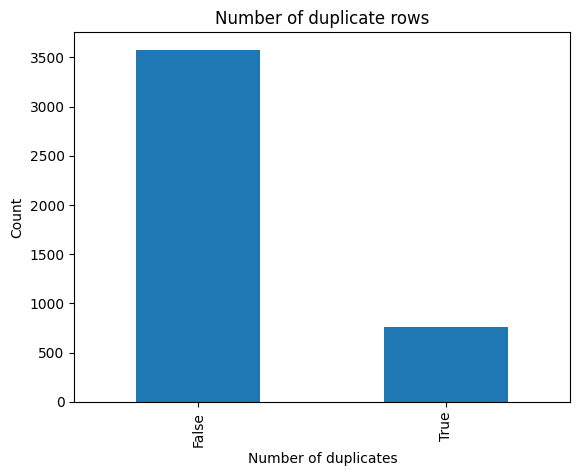

In [43]:
#visualizing duplicates

car_df.duplicated().value_counts().plot(kind='bar')
plt.title('Number of duplicate rows')
plt.xlabel('Number of duplicates')
plt.ylabel('Count')
plt.show()

In [44]:
duplicates = car_df.loc[car_df.duplicated()]

In [45]:
duplicates.sort_values('name')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4016,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
2578,Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner
1835,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
899,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
573,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
...,...,...,...,...,...,...,...,...
1658,Volkswagen Polo Petrol Comfortline 1.2L,2013,400000,100000,Petrol,Individual,Manual,First Owner
2950,Volkswagen Vento 1.5 TDI Comfortline,2012,390000,45454,Diesel,Dealer,Manual,First Owner
2936,Volkswagen Vento 1.5 TDI Highline Plus AT,2017,890000,40219,Diesel,Dealer,Automatic,First Owner
3052,Volkswagen Vento Diesel Comfortline,2012,215000,97000,Diesel,Individual,Manual,First Owner


Have a look at our 763 duplicates, not completely duplicates. so we need to segregate by name and selling price.

In [46]:
#find the duplicates if only all the columns matched

duplicates1 = car_df.loc[car_df.duplicated(subset=['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type','transmission', 'owner'])]
duplicates1.sort_values('name')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4016,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
2578,Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner
1835,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
899,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
573,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
...,...,...,...,...,...,...,...,...
1658,Volkswagen Polo Petrol Comfortline 1.2L,2013,400000,100000,Petrol,Individual,Manual,First Owner
2950,Volkswagen Vento 1.5 TDI Comfortline,2012,390000,45454,Diesel,Dealer,Manual,First Owner
2936,Volkswagen Vento 1.5 TDI Highline Plus AT,2017,890000,40219,Diesel,Dealer,Automatic,First Owner
3052,Volkswagen Vento Diesel Comfortline,2012,215000,97000,Diesel,Individual,Manual,First Owner


now we need to remove the 763 rows

In [47]:
#removing the duplicates
car_df.drop_duplicates(inplace=True)
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [48]:
#checking the distribution of categorical data
print(car_df.fuel.value_counts())
print(car_df.transmission.value_counts())
print(car_df.seller_type.value_counts())
print(car_df.owner.value_counts())

Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64
Manual       3265
Automatic     312
Name: transmission, dtype: int64
Individual          2832
Dealer               712
Trustmark Dealer      33
Name: seller_type, dtype: int64
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64


In [49]:
#Encoding the nominal values string to int .
from sklearn.preprocessing import LabelEncoder
#encoding categorical variables
le = LabelEncoder()
car_df['transmission'] = le.fit_transform(car_df['transmission'])
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,1,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,1,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,1,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,1,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,1,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,1,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,1,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,1,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,1,First Owner


In [50]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [51]:
#labelbinaririzer using get dummis for categorical values

car_df = pd.get_dummies(car_df, columns=['fuel', 'seller_type', 'owner'])
car_df.head()

,name,year,selling_price,km_driven,transmission,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0,0,1,0,1,0,1,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0,0,1,0,1,0,1,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,1,0,0,0,0,1,0,1,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0,0,1,0,1,0,1,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,1,0,0,0,0,1,0,0,0,1,0,0


In [52]:
car_df.shape

(3577, 18)

**3.Exploratory Data Analysis (EDA):**

In [53]:
#checking statistical summary
car_df.describe()

,year,selling_price,km_driven,transmission,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,3577.000000,3.577000e+03,3577.000000,3577.000000,3577.000000,3577.000000,3577.00000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000
mean,2012.962538,4.739125e+05,69250.545709,0.912776,0.010344,0.503215,0.00028,0.006150,0.480011,0.199049,0.791725,0.009226,0.620073,0.020967,0.273413,0.004753,0.080794
std,4.251759,5.093018e+05,47579.940016,0.282202,0.101192,0.500060,0.01672,0.078194,0.499670,0.399341,0.406131,0.095619,0.485436,0.143295,0.445774,0.068785,0.272557
min,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,2.000000e+05,36000.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,3.500000e+05,60000.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000e+05,90000.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2020.000000,8.900000e+06,806599.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 1000x500 with 0 Axes>

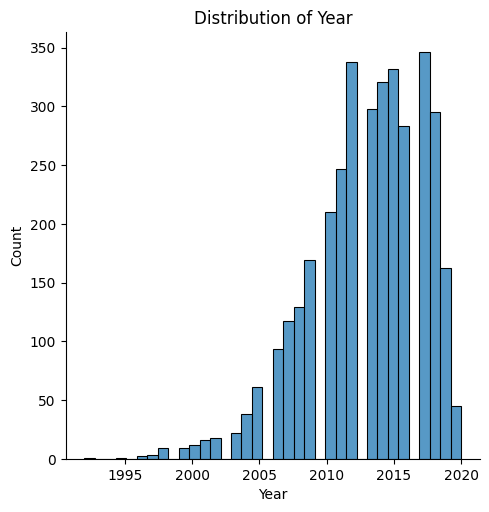

In [54]:
#Creating a visual for distribution of year

plt.figure(figsize=(10, 5))
sns.displot(car_df['year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Year')
plt.show()

<Figure size 1000x500 with 0 Axes>

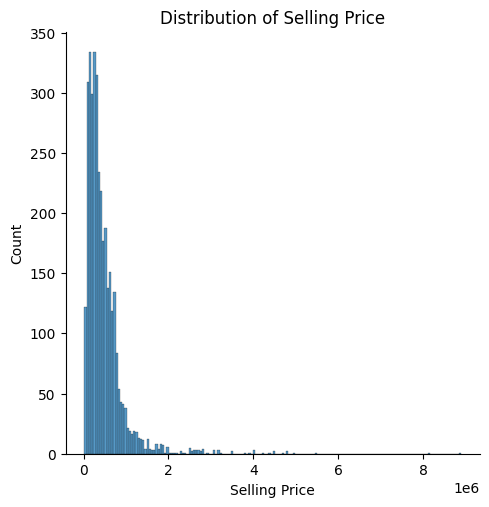

In [55]:
#Creating a visual for distribution of selling price

plt.figure(figsize=(10, 5))
sns.displot(car_df['selling_price'])
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.title('Distribution of Selling Price')
plt.show()


<ipython-input-56-0b41e737bc49>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_df.corr(), annot=True)


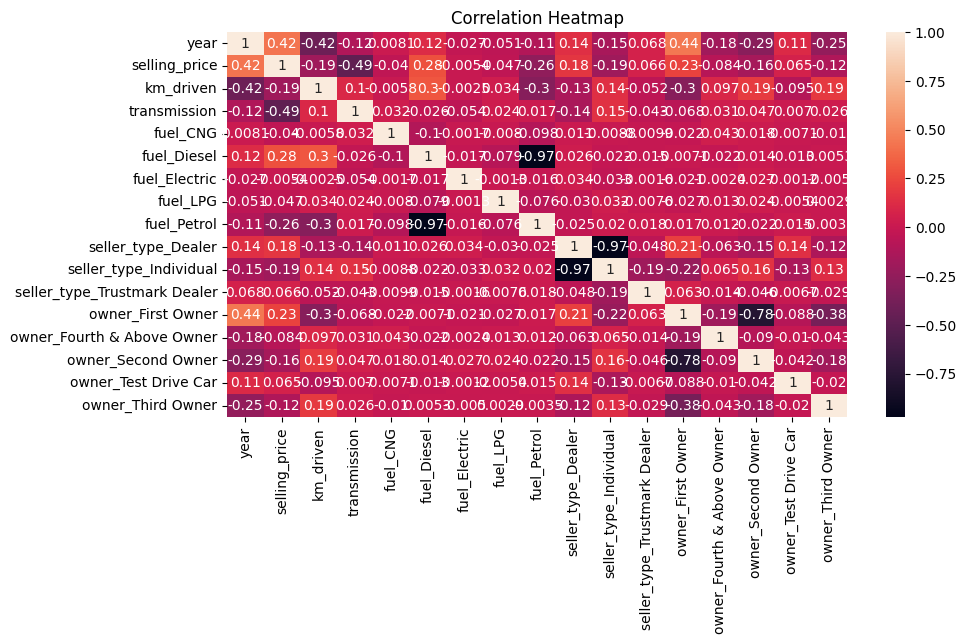

<ipython-input-56-0b41e737bc49>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_df.corr()


,year,selling_price,km_driven,transmission,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
year,1.000000,0.424260,-0.417490,-0.116692,0.008051,0.115800,-0.027388,-0.051457,-0.108551,0.140269,-0.153833,0.067571,0.442652,-0.181847,-0.288943,0.106746,-0.247144
selling_price,0.424260,1.000000,-0.187359,-0.486269,-0.040303,0.276873,-0.005383,-0.046668,-0.261443,0.175024,-0.187640,0.066012,0.229482,-0.084116,-0.158960,0.065189,-0.120963
km_driven,-0.417490,-0.187359,1.000000,0.101387,-0.005801,0.299145,-0.002549,0.033680,-0.303389,-0.132437,0.142546,-0.052344,-0.297612,0.096649,0.192028,-0.094556,0.189044
transmission,-0.116692,-0.486269,0.101387,1.000000,0.031603,-0.025755,-0.054096,0.024318,0.017379,-0.141183,0.148879,-0.042713,-0.068460,0.031408,0.047360,0.006955,0.026205
fuel_CNG,0.008051,-0.040303,-0.005801,0.031603,1.000000,-0.102894,-0.001710,-0.008042,-0.098226,0.011316,-0.008804,-0.009865,-0.022445,0.042895,0.017877,-0.007065,-0.010031
fuel_Diesel,0.115800,0.276873,0.299145,-0.025755,-0.102894,1.000000,-0.016830,-0.079174,-0.966988,0.026202,-0.022175,-0.015241,-0.007063,-0.022405,0.013618,-0.012639,0.005275
fuel_Electric,-0.027388,-0.005383,-0.002549,-0.054096,-0.001710,-0.016830,1.000000,-0.001316,-0.016067,0.033545,-0.032604,-0.001614,-0.021363,-0.002447,0.027261,-0.001156,-0.004958
fuel_LPG,-0.051457,-0.046668,0.033680,0.024318,-0.008042,-0.079174,-0.001316,1.000000,-0.075582,-0.030261,0.031542,-0.007591,-0.026828,0.013445,0.023947,-0.005436,0.002920
fuel_Petrol,-0.108551,-0.261443,-0.303389,0.017379,-0.098226,-0.966988,-0.016067,-0.075582,1.000000,-0.024901,0.020130,0.018493,0.016527,0.011714,-0.021909,0.014969,-0.003538
seller_type_Dealer,0.140269,0.175024,-0.132437,-0.141183,0.011316,0.026202,0.033545,-0.030261,-0.024901,1.000000,-0.971955,-0.048105,0.208458,-0.063181,-0.151858,0.138619,-0.124672


In [56]:
#Creating a heatmap for correlation between numerical variables

plt.figure(figsize=(10, 5))
sns.heatmap(car_df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()
#checking the correlation between numerical variables
car_df.corr()

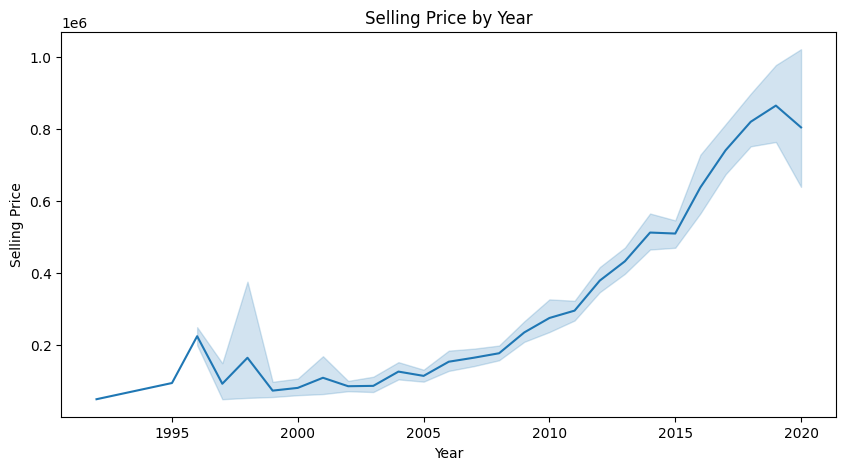

In [57]:
#Create visual selling price by age

plt.figure(figsize=(10, 5))
sns.lineplot(data=car_df, x='year', y='selling_price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Selling Price by Year')
plt.show()

**4.Feature Engineering:**

In [58]:
#calculate age of the car
car_df['age'] = 2023 - car_df['year']

# converting the year column to numerical values
car_df['year'] = car_df['year'].astype('int64')

# Create a new feature called 'mileage_per_year' that is the kilometers driven divided by the age of the car.
car_df['mileage_per_year'] = car_df['km_driven'] / car_df['age']

# Create a new feature called 'price_per_kilometer' that is the selling price divided by the kilometers driven.
car_df['price_per_kilometer'] = car_df['selling_price'] / car_df['km_driven']


In [59]:
car_df.head()

,name,year,selling_price,km_driven,transmission,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,...,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,age,mileage_per_year,price_per_kilometer
0,Maruti 800 AC,2007,60000,70000,1,0,0,0,0,1,...,1,0,1,0,0,0,0,16,4375.000000,0.857143
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0,0,1,...,1,0,1,0,0,0,0,16,3125.000000,2.700000
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,1,0,0,0,...,1,0,1,0,0,0,0,11,9090.909091,6.000000
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0,0,1,...,1,0,1,0,0,0,0,6,7666.666667,5.434783
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,1,0,0,0,...,1,0,0,0,1,0,0,9,15666.666667,3.191489


Assighning the independent data to X and Dependent data to Y

In [60]:
X = car_df.drop(['name','selling_price'],axis=1)
Y = car_df['selling_price']

In [61]:
X

,year,km_driven,transmission,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,age,mileage_per_year,price_per_kilometer
0,2007,70000,1,0,0,0,0,1,0,1,0,1,0,0,0,0,16,4375.000000,0.857143
1,2007,50000,1,0,0,0,0,1,0,1,0,1,0,0,0,0,16,3125.000000,2.700000
2,2012,100000,1,0,1,0,0,0,0,1,0,1,0,0,0,0,11,9090.909091,6.000000
3,2017,46000,1,0,0,0,0,1,0,1,0,1,0,0,0,0,6,7666.666667,5.434783
4,2014,141000,1,0,1,0,0,0,0,1,0,0,0,1,0,0,9,15666.666667,3.191489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,80000,1,0,1,0,0,0,0,1,0,0,0,1,0,0,9,8888.888889,5.124987
4336,2014,80000,1,0,1,0,0,0,0,1,0,0,0,1,0,0,9,8888.888889,5.124987
4337,2009,83000,1,0,0,0,0,1,0,1,0,0,0,1,0,0,14,5928.571429,1.325301
4338,2016,90000,1,0,1,0,0,0,0,1,0,1,0,0,0,0,7,12857.142857,9.611111


In [62]:
Y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 3577, dtype: int64

In [63]:
# Spliting data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size= 0.4, random_state =42)

**5.Model Selection and Training:**

In [64]:
#importing models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [65]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, Y_train)

# Random Forest Model
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

# Gradient Boosting Model
gb = GradientBoostingRegressor()
gb.fit(X_train, Y_train)

# XGBoost Model
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**6.Model Evaluation**

In [66]:
#Predicting the model
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = gb.predict(X_test)
y_pred4 = xgb.predict(X_test)

In [67]:
from sklearn import metrics
Score1 = metrics.r2_score(Y_test, y_pred1)
Score2 = metrics.r2_score(Y_test, y_pred2)
Score3 = metrics.r2_score(Y_test, y_pred3)
Score4 = metrics.r2_score(Y_test, y_pred4)

In [68]:
print(Score1,Score2,Score3,Score4)

0.4381978983318635 0.8969273591680305 0.9273979556736967 0.8502332967106812


In [69]:
MSE1 = metrics.mean_squared_error(Y_test, y_pred1)
MSE2 = metrics.mean_squared_error(Y_test, y_pred2)
MSE3 = metrics.mean_squared_error(Y_test, y_pred3)
MSE4 = metrics.mean_squared_error(Y_test, y_pred4)
print(MSE1,MSE2,MSE3,MSE4)

146055814016.21368 26796550626.659863 18874886106.395077 38935948613.39204


In [70]:
result = pd.DataFrame({'models':["Lr","Rf","Gb","Xgb"],'R2 Score':[Score1,Score2,Score3,Score4],'MSE':[MSE1,MSE2,MSE3,MSE4]})
result

,models,R2 Score,MSE
0,Lr,0.438198,1.460558e+11
1,Rf,0.896927,2.679655e+10
2,Gb,0.927398,1.887489e+10
3,Xgb,0.850233,3.893595e+10


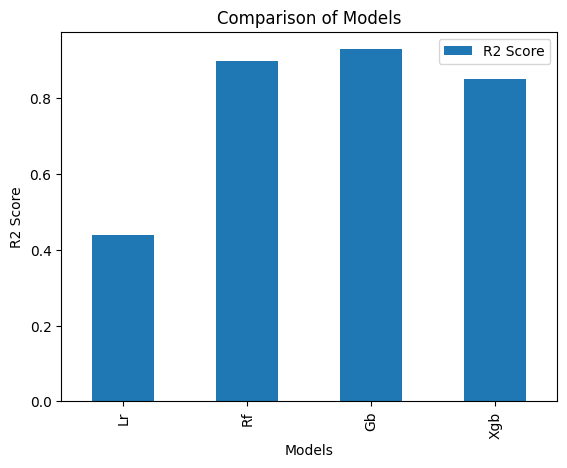

In [71]:
#Visualize score
result.plot(x='models', y='R2 Score', kind='bar')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparison of Models')
plt.show()

**7.Conclusion**


The evaluation of different models based on their R2 scores and Mean Squared Error (MSE) values highlights distinct performances in predictive capabilities.

Gradient Boosting (Gb) emerges as the top-performing model with an impressive R2 score of approximately 0.9184, signifying its ability to explain around 91.84% of the variance in the data. Additionally, Gb demonstrates the lowest MSE among the models, standing at approximately 21,225,320,000. This indicates its efficiency in minimizing prediction errors compared to other models.

Following closely behind is Random Forest (Rf), which exhibits a notable R2 score of approximately 0.8854, explaining about 88.54% of the variance. Although its MSE is higher than that of Gb, it still maintains a considerably lower error rate compared to the other models, standing at approximately 29,781,370,000.

XGBoost (Xgb) secures an R2 score of around 0.8502, explaining approximately 85.02% of the variance, with an MSE of approximately 38,935,950,000. While performing well, it falls slightly behind Gb and Rf in terms of predictive accuracy.

Lastly, Linear Regression (Lr) yields an R2 score of approximately 0.4382, indicating its limitation in explaining the variance in the data compared to the other models. Its significantly higher MSE of approximately 146,055,800,000 further underscores its relatively weaker predictive performance.

In conclusion, Gradient Boosting and Random Forest demonstrate superior predictive capabilities among the evaluated models, with Gradient Boosting exhibiting the highest R2 score and the lowest MSE. These results suggest that Gradient Boosting and Random Forest might be more suitable for this specific dataset, while Linear Regression performs relatively poorer in predictive accuracy.